In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller, kpss

# Ignore warnings
warnings.filterwarnings("ignore")
# Step 1: Load the dataset
file_path = "NFLX (1).csv"  # Update with correct path
df = pd.read_csv(file_path)



In [16]:


# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# We'll use the 'Close' column as the value series for stationarity
df['Value'] = df['Close']  # You can replace 'Close' with any other column if needed
df.dropna(inplace=True)

# ---- Function to run ADF & KPSS Tests ----


In [17]:
def stationarity_tests(series):
    print("\n--- Stationarity Tests ---")

    # ADF Test
    adf_test = adfuller(series, autolag='AIC')
    print(f"\nADF Test:\nTest Statistic: {adf_test[0]:.4f}\np-value: {adf_test[1]:.4f}")

    # KPSS Test
    try:
        kpss_test = kpss(series, regression='c', nlags='auto')
        print(f"\nKPSS Test:\nTest Statistic: {kpss_test[0]:.4f}\np-value: {kpss_test[1]:.4f}")
    except Exception as e:
        print(f"\nKPSS Test Error: {e}")

# ---- ORIGINAL SERIES ----
print("\n📉 Stationarity Test for Original Data:")
stationarity_tests(df['Value'])

# ---- DIFFERENCED SERIES ----
df['Value_Diff'] = df['Value'].diff()
df.dropna(inplace=True)
print("\n📈 Stationarity Test after First Differencing:")
stationarity_tests(df['Value_Diff'])

# ---- LOG + DIFFERENCED SERIES ----
df['Log_Value'] = np.log(df['Value'])
df['Log_Value_Diff'] = df['Log_Value'].diff()
df.dropna(inplace=True)
print("\n📊 Stationarity Test after Log Differencing:")
stationarity_tests(df['Log_Value_Diff'])

# ---- PLOTTING



📉 Stationarity Test for Original Data:

--- Stationarity Tests ---

ADF Test:
Test Statistic: -1.8126
p-value: 0.3742

KPSS Test:
Test Statistic: 3.9960
p-value: 0.0100

📈 Stationarity Test after First Differencing:

--- Stationarity Tests ---

ADF Test:
Test Statistic: -14.2423
p-value: 0.0000

KPSS Test:
Test Statistic: 0.1115
p-value: 0.1000

📊 Stationarity Test after Log Differencing:

--- Stationarity Tests ---

ADF Test:
Test Statistic: -14.3952
p-value: 0.0000

KPSS Test:
Test Statistic: 0.1024
p-value: 0.1000


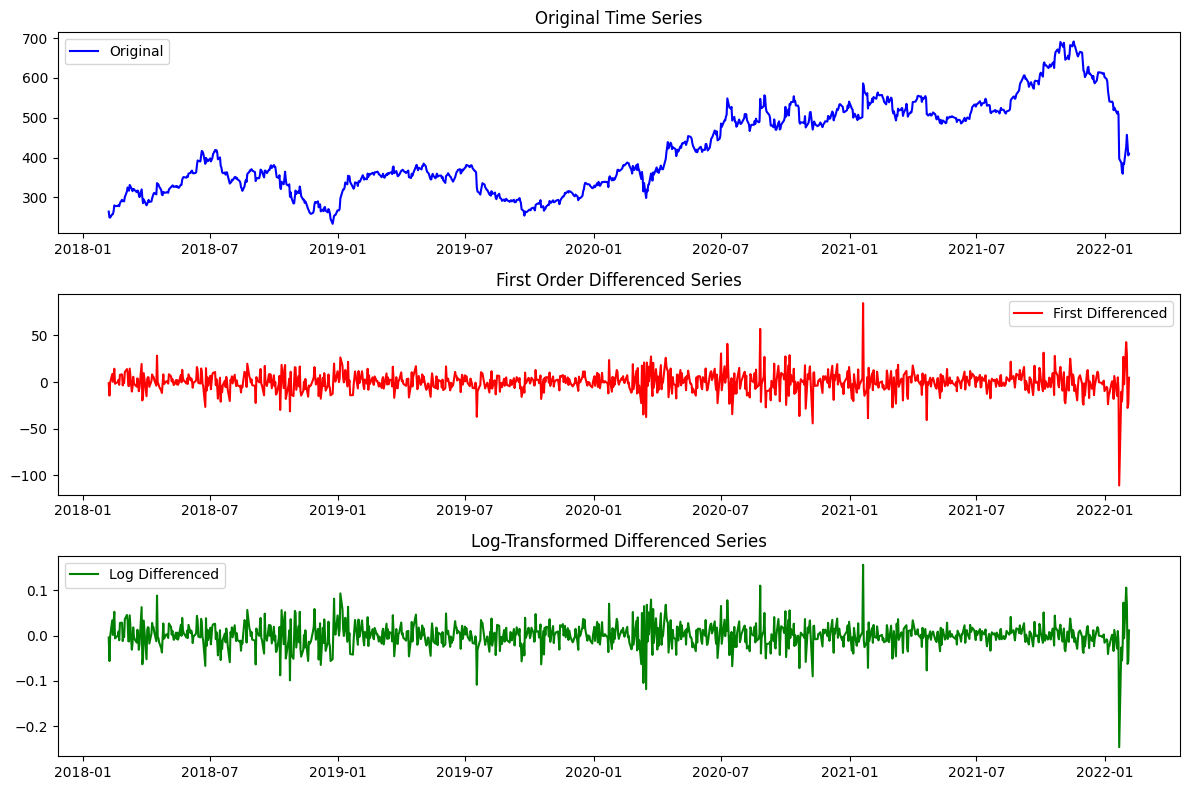

In [19]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label="Original", color='blue')
plt.title("Original Time Series")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Value_Diff'], label="First Differenced", color='red')
plt.title("First Order Differenced Series")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Log_Value_Diff'], label="Log Differenced", color='green')
plt.title("Log-Transformed Differenced Series")
plt.legend()

plt.tight_layout()
plt.show()












